# EDA

In [1]:
# ============================================================================
# LOAD CLEANED DATASETS (use this in your EDA notebook)
# ============================================================================

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Get project root
project_root = Path.cwd().parent.parent
output_dir = project_root / "data" / "outputs"

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Loading cleaned datasets from Parquet...")

# Load all cleaned datasets (Parquet preserves dtypes!)
df_sessions_clean = pd.read_parquet(output_dir / 'sessions_clean.parquet')
df_participants_clean = pd.read_parquet(output_dir / 'participants_clean.parquet')
df_brainstorming_clean = pd.read_parquet(output_dir / 'brainstorming_clean.parquet')
df_questionnaires_clean = pd.read_parquet(output_dir / 'questionnaires_clean.parquet')

print("✅ All datasets loaded!")
print(f"\nDataset shapes:")
print(f"  Sessions:       {df_sessions_clean.shape}")
print(f"  Participants:   {df_participants_clean.shape}")
print(f"  Brainstorming:  {df_brainstorming_clean.shape}")
print(f"  Questionnaires: {df_questionnaires_clean.shape}")

# Verify datetime is still datetime (not string!)
print(f"\nDatetime verification:")
print(f"  session_created_at: {df_sessions_clean['session_created_at'].dtype}")
print(f"  completed_at (brainstorm): {df_brainstorming_clean['completed_at'].dtype}")

Loading cleaned datasets from Parquet...
✅ All datasets loaded!

Dataset shapes:
  Sessions:       (142, 6)
  Participants:   (142, 13)
  Brainstorming:  (142, 13)
  Questionnaires: (140, 14)

Datetime verification:
  session_created_at: datetime64[ns, UTC]
  completed_at (brainstorm): datetime64[ns, UTC]


In [20]:
# %%
# Verify List Columns Are Properly Loaded
print("\n" + "="*60)
print("LIST COLUMNS VERIFICATION")
print("="*60)

# Check each dataframe's list columns
print("\n1. Participants DataFrame:")
print(f"   brainstorming_modalities type: {type(df_participants_clean['brainstorming_modalities'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_participants_clean['brainstorming_modalities'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n2. Brainstorming DataFrame:")
print(f"   used_ideas type: {type(df_brainstorming_clean['used_ideas'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_brainstorming_clean['used_ideas'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n3. Questionnaires DataFrame:")
print(f"   ai_benefits type: {type(df_questionnaires_clean['ai_benefits'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_questionnaires_clean['ai_benefits'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print(f"\n   difficulties type: {type(df_questionnaires_clean['difficulties'].iloc[0])}")
print(f"   Sample values:")
for i in range(3):
    val = df_questionnaires_clean['difficulties'].iloc[i]
    print(f"     Row {i}: {val} (type: {type(val).__name__})")

print("\n" + "="*60)
print("✅ If all show 'list' type, Parquet preserved the data correctly!")
print("❌ If any show 'str' type, we need to convert them")
print("="*60)


LIST COLUMNS VERIFICATION

1. Participants DataFrame:
   brainstorming_modalities type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['inPerson'] (type: ndarray)
     Row 1: ['inPerson'] (type: ndarray)
     Row 2: ['remote'] (type: ndarray)

2. Brainstorming DataFrame:
   used_ideas type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: [1 2 3 4 5] (type: ndarray)
     Row 1: [1 2 3 4 5] (type: ndarray)
     Row 2: [1 2 3 4 5] (type: ndarray)

3. Questionnaires DataFrame:
   ai_benefits type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['stimulatingNewIdeas' 'timeSaving'] (type: ndarray)
     Row 1: ['timeSaving' 'stimulatingNewIdeas' 'betterThoughtOrganization'
 'helpReformulation'] (type: ndarray)
     Row 2: ['timeSaving' 'stimulatingNewIdeas'] (type: ndarray)

   difficulties type: <class 'numpy.ndarray'>
   Sample values:
     Row 0: ['noDifficulty'] (type: ndarray)
     Row 1: ['noDifficulty'] (type: ndarray)
     Row 2: ['lackInspiration'] (type: ndarra

## **Section 1: Who Are Your Users?**

### 1.1: Demographics Summary Table

In [2]:
# Create demographics summary
print("="*60)
print("PARTICIPANT DEMOGRAPHICS SUMMARY")
print("="*60)

demographics_summary = pd.DataFrame({
    'Metric': [
        'Total Participants',
        'Group A',
        'Group B',
        'English Speakers',
        'French Speakers',
        'AI Regular Users',
        'AI Occasional Users',
        'AI Never Users',
        'Avg AI Comfort (1-5)',
        'Avg Creativity Level (1-5)',
        'Many Brainstorming Experience',
        'Few Brainstorming Experience'
    ],
    'Count / Value': [
        len(df_participants_clean),
        len(df_participants_clean[df_sessions_clean['group_assigned'] == 'A']),
        len(df_participants_clean[df_sessions_clean['group_assigned'] == 'B']),
        (df_participants_clean['language'] == 'en').sum(),
        (df_participants_clean['language'] == 'fr').sum(),
        (df_participants_clean['ai_tools_usage'] == 'regularly').sum(),
        (df_participants_clean['ai_tools_usage'] == 'occasionally').sum(),
        (df_participants_clean['ai_tools_usage'] == 'never').sum(),
        df_participants_clean['ai_comfort_level'].mean().round(2),
        df_participants_clean['creativity_level'].mean().round(2),
        (df_participants_clean['brainstorming_experience'] == 'many').sum(),
        (df_participants_clean['brainstorming_experience'] == 'few').sum()
    ]
})

print(demographics_summary.to_string(index=False))
print("="*60)

PARTICIPANT DEMOGRAPHICS SUMMARY
                       Metric  Count / Value
           Total Participants         142.00
                      Group A          71.00
                      Group B          71.00
             English Speakers          23.00
              French Speakers         119.00
             AI Regular Users          92.00
          AI Occasional Users          48.00
               AI Never Users           2.00
         Avg AI Comfort (1-5)           3.76
   Avg Creativity Level (1-5)           3.63
Many Brainstorming Experience          67.00
 Few Brainstorming Experience          58.00


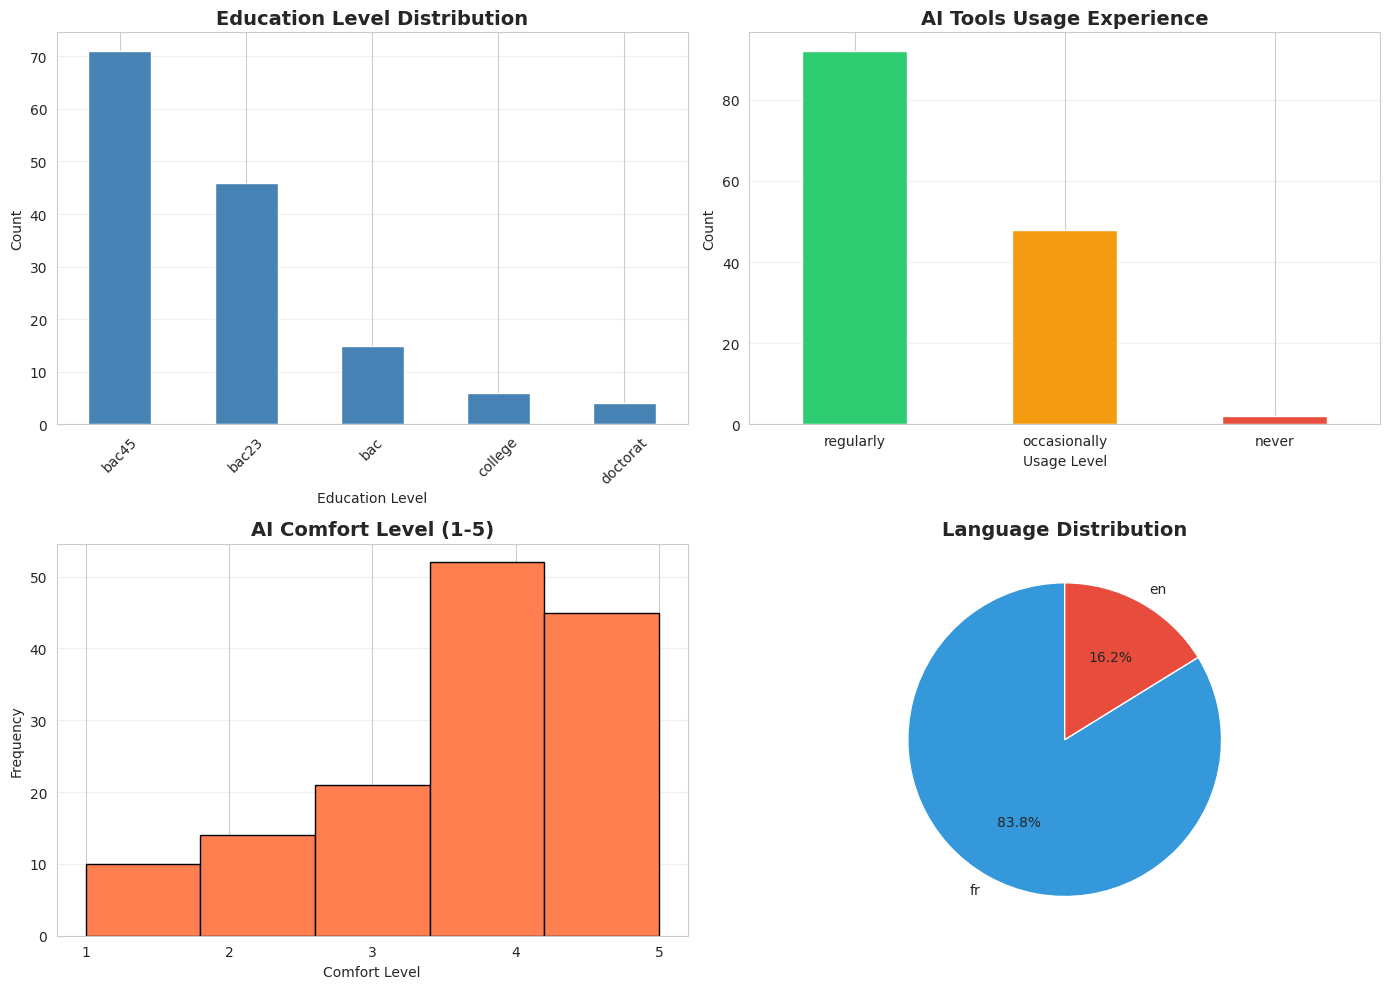

✅ Demographics visualizations created!


In [3]:
# %%
# 1. Education Level Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Education Levels
education_counts = df_participants_clean['education_level'].value_counts()
ax1 = axes[0, 0]
education_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Education Level Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: AI Tools Usage
ai_usage_counts = df_participants_clean['ai_tools_usage'].value_counts()
ax2 = axes[0, 1]
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ai_usage_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('AI Tools Usage Experience', fontsize=14, fontweight='bold')
ax2.set_xlabel('Usage Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Plot 3: AI Comfort Level Distribution
ax3 = axes[1, 0]
df_participants_clean['ai_comfort_level'].hist(bins=5, ax=ax3, color='coral', edgecolor='black')
ax3.set_title('AI Comfort Level (1-5)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Comfort Level')
ax3.set_ylabel('Frequency')
ax3.set_xticks([1, 2, 3, 4, 5])
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Language Distribution
language_counts = df_participants_clean['language'].value_counts()
ax4 = axes[1, 1]
ax4.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', 
        colors=['#3498db', '#e74c3c'], startangle=90)
ax4.set_title('Language Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Demographics visualizations created!")

✅ **Highly educated sample:** 50% have Master's degree (bac+5)  
✅ **AI-savvy users:** 65% regular AI users, only 2 never used it  
✅ **Confident with AI:** Most rated 4-5 on comfort scale  
✅ **French-dominant:** 84% French speakers

### 1.2: Group A vs B Comparison (Critical!)

In [8]:
# %%
# Group A vs B Demographic Comparison
print("="*60)
print("GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK")
print("="*60)

# Merge participants with sessions to get group assignment
df_demo = df_participants_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id', 
    how='left'
)

df_demo.head()

GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK


,participant_id,session_id,language,education_level,ai_tools_usage,ai_comfort_level,creativity_level,ai_creative_process,ai_tool_specification,brainstorming_experience,brainstorming_modalities,consent_confirmation,instructions_understood,group_assigned
0,673b723b78a95d45ec47c311,362a42fb-cf47-4ebf-abf6-7c1131f94e11,en,bac23,never,1,3,no,None,few,[inPerson],True,True,B
1,5ede918b4280d611f9a38200,187aea78-1f2b-4720-98f7-3915ddb659be,fr,doctorat,regularly,5,3,yes,Support à la créativité,many,[inPerson],True,True,B
2,58bfee7de5869400018f5e9e,9249cc22-ee1a-440e-85d0-3f018afbe082,en,bac45,regularly,4,4,no,None,few,[remote],True,True,B
3,68262995c77dd8cc9b293aa6,0c82ca88-3e43-49ed-859f-fd24173e7fe6,fr,bac45,occasionally,3,4,yes,ChatGPT pour resoudre un probleme statistique,few,[inPerson],True,True,A
4,5d164f9b1a4be700176367bd,421a5ad2-0867-460b-891b-200786b51f60,fr,bac23,regularly,4,3,no,None,many,[remote],True,True,B


In [10]:
print("="*60)
print("GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK")
print("="*60)

# Create comparison table
comparison = pd.DataFrame({
    'Metric': [
        'Sample Size',
        'English (%)',
        'French (%)',
        'Avg Education Level',
        'AI Regular Users (%)',
        'AI Occasional Users (%)',
        'AI Never Users (%)',
        'Avg AI Comfort (1-5)',
        'Avg Creativity (1-5)',
        'Many Brainstorm Exp (%)'
    ],
    'Group A': [
        (df_demo['group_assigned'] == 'A').sum(),
        ((df_demo['group_assigned'] == 'A') & (df_demo['language'] == 'en')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['language'] == 'fr')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        'Mixed',
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'regularly')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'occasionally')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        ((df_demo['group_assigned'] == 'A') & (df_demo['ai_tools_usage'] == 'never')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100,
        df_demo[df_demo['group_assigned'] == 'A']['ai_comfort_level'].mean().round(2),
        df_demo[df_demo['group_assigned'] == 'A']['creativity_level'].mean().round(2),
        ((df_demo['group_assigned'] == 'A') & (df_demo['brainstorming_experience'] == 'many')).sum() / (df_demo['group_assigned'] == 'A').sum() * 100
    ],
    'Group B': [
        (df_demo['group_assigned'] == 'B').sum(),
        ((df_demo['group_assigned'] == 'B') & (df_demo['language'] == 'en')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['language'] == 'fr')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        'Mixed',
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'regularly')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'occasionally')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        ((df_demo['group_assigned'] == 'B') & (df_demo['ai_tools_usage'] == 'never')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100,
        df_demo[df_demo['group_assigned'] == 'B']['ai_comfort_level'].mean().round(2),
        df_demo[df_demo['group_assigned'] == 'B']['creativity_level'].mean().round(2),
        ((df_demo['group_assigned'] == 'B') & (df_demo['brainstorming_experience'] == 'many')).sum() / (df_demo['group_assigned'] == 'B').sum() * 100
    ]
})

# Round percentage columns
comparison['Group A'] = comparison['Group A'].apply(lambda x: f"{x:.1f}%" if isinstance(x, float) and x > 1 else x)
comparison['Group B'] = comparison['Group B'].apply(lambda x: f"{x:.1f}%" if isinstance(x, float) and x > 1 else x)

print(comparison.to_string(index=False))
print("="*60)

GROUP A vs GROUP B - DEMOGRAPHIC BALANCE CHECK
                 Metric Group A Group B
            Sample Size      71      71
            English (%)   16.9%   15.5%
             French (%)   83.1%   84.5%
    Avg Education Level   Mixed   Mixed
   AI Regular Users (%)   64.8%   64.8%
AI Occasional Users (%)   33.8%   33.8%
     AI Never Users (%)    1.4%    1.4%
   Avg AI Comfort (1-5)    3.8%    3.8%
   Avg Creativity (1-5)    3.7%    3.5%
Many Brainstorm Exp (%)   45.1%   49.3%


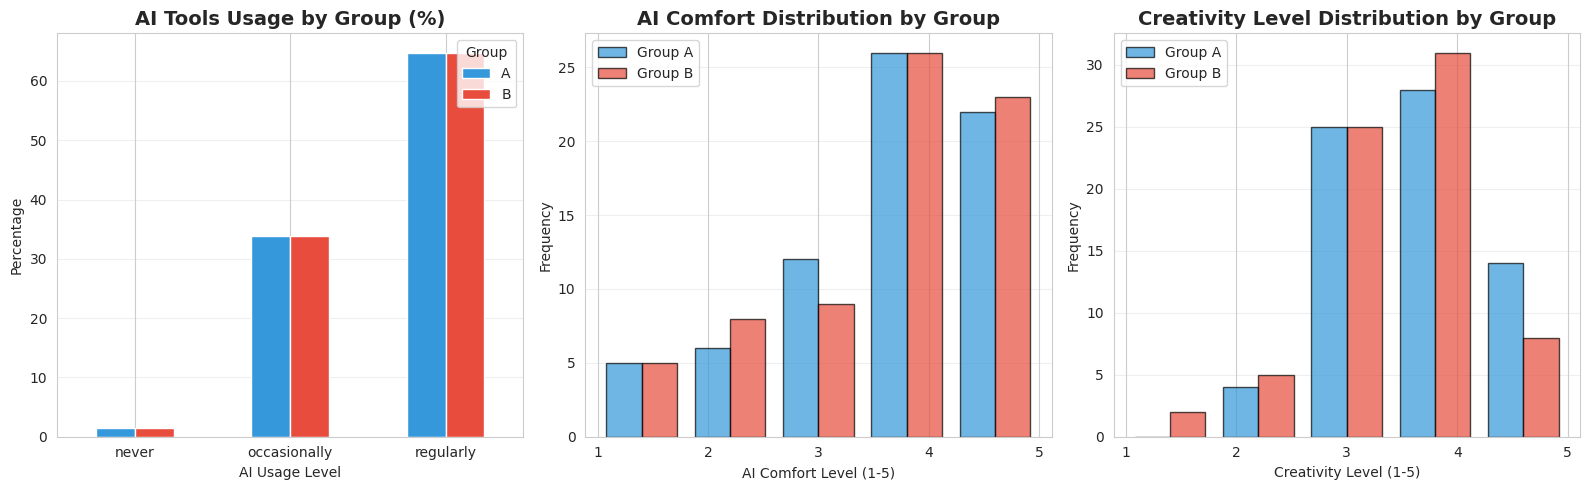

✅ Group balance visualizations created!


In [5]:
# %%
# Visualize Group A vs B Balance
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: AI Tools Usage by Group
ai_usage_by_group = pd.crosstab(df_demo['ai_tools_usage'], df_demo['group_assigned'], normalize='columns') * 100
ai_usage_by_group.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('AI Tools Usage by Group (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AI Usage Level')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Group', loc='upper right')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: AI Comfort Level by Group
comfort_a = df_demo[df_demo['group_assigned'] == 'A']['ai_comfort_level']
comfort_b = df_demo[df_demo['group_assigned'] == 'B']['ai_comfort_level']
axes[1].hist([comfort_a, comfort_b], bins=5, label=['Group A', 'Group B'], 
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1].set_title('AI Comfort Distribution by Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AI Comfort Level (1-5)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].set_xticks([1, 2, 3, 4, 5])
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Creativity Level by Group
creativity_a = df_demo[df_demo['group_assigned'] == 'A']['creativity_level']
creativity_b = df_demo[df_demo['group_assigned'] == 'B']['creativity_level']
axes[2].hist([creativity_a, creativity_b], bins=5, label=['Group A', 'Group B'],
             color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[2].set_title('Creativity Level Distribution by Group', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Creativity Level (1-5)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].set_xticks([1, 2, 3, 4, 5])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Group balance visualizations created!")

In [19]:
df_demo['brainstorming_modalities'].nunique

<bound method IndexOpsMixin.nunique of 0              [inPerson]
1              [inPerson]
2                [remote]
3              [inPerson]
4                [remote]
              ...        
137    [inPerson, remote]
138            [inPerson]
139    [inPerson, remote]
140            [inPerson]
141                  None
Name: brainstorming_modalities, Length: 142, dtype: object>

In [21]:
# %%
# Additional Context: Brainstorming Modalities (NUMPY ARRAY COMPATIBLE)
import numpy as np

print("\n" + "="*60)
print("BRAINSTORMING CONTEXT")
print("="*60)

# Recreate df_demo with proper merge
df_demo = df_participants_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id', 
    how='left'
)

# Count overall modalities (works with numpy arrays)
modality_counts = {}
for modalities in df_demo['brainstorming_modalities'].dropna():
    # numpy arrays are iterable, so this works fine
    if hasattr(modalities, '__iter__') and not isinstance(modalities, str):
        for mod in modalities:
            modality_counts[mod] = modality_counts.get(mod, 0) + 1
    
print(f"\nBrainstorming Modality Preferences (Overall):")
total_with_modality = len(df_demo[df_demo['brainstorming_modalities'].notna()])
print(f"Total participants with modality data: {total_with_modality}")
for mod, count in sorted(modality_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / total_with_modality * 100
    print(f"  {mod}: {count} ({pct:.1f}%)")

# By group
print(f"\nBy Group:")
for group in ['A', 'B']:
    group_data = df_demo[df_demo['group_assigned'] == group]
    group_modalities = {}
    
    for modalities in group_data['brainstorming_modalities'].dropna():
        if hasattr(modalities, '__iter__') and not isinstance(modalities, str):
            for mod in modalities:
                group_modalities[mod] = group_modalities.get(mod, 0) + 1
    
    total_in_group = len(group_data[group_data['brainstorming_modalities'].notna()])
    print(f"\n  Group {group} (n={total_in_group} with modality data):")
    for mod, count in sorted(group_modalities.items(), key=lambda x: x[1], reverse=True):
        pct = count / total_in_group * 100 if total_in_group > 0 else 0
        print(f"    {mod}: {count} ({pct:.1f}%)")

print("="*60)


BRAINSTORMING CONTEXT

Brainstorming Modality Preferences (Overall):
Total participants with modality data: 126
  inPerson: 119 (94.4%)
  remote: 75 (59.5%)

By Group:

  Group A (n=62 with modality data):
    inPerson: 60 (96.8%)
    remote: 37 (59.7%)

  Group B (n=64 with modality data):
    inPerson: 59 (92.2%)
    remote: 38 (59.4%)


### **Key Findings:**

✅ **Multiple experiences possible:** Percentages add up to >100% because participants could select BOTH inPerson AND remote

**Overall Pattern:**
- 📍 **94% have in-person brainstorming experience** (dominant)
- 💻 **60% have remote brainstorming experience**
- 🔗 **Many have both** (approximately 68 people = 94.4% + 59.5% - 100% overlap)

**Group Balance:**
- ✅ **Very similar between groups:**
  - Group A: 97% in-person, 60% remote
  - Group B: 92% in-person, 59% remote
- ✅ **No meaningful difference** - groups are balanced on prior experience

**Missing Data:**
- 16 participants (11%) didn't specify modality preferences
- Balanced across groups (9 in A, 7 in B)

### **Business Insight:**
Users are **primarily experienced with in-person brainstorming**, with many also having remote experience. This suggests they're comparing your tool to traditional face-to-face sessions.

In [15]:
# %%
# Study Compliance Check
print("\n" + "="*60)
print("STUDY COMPLIANCE & DATA QUALITY")
print("="*60)

# Check consent and instructions understanding
print("\nConsent Confirmation:")
consent_counts = df_demo['consent_confirmation'].value_counts()
print(f"  All participants gave consent: {consent_counts.get(True, 0)} (100%)")
if False in consent_counts.index:
    print(f"  ⚠️ No consent: {consent_counts.get(False, 0)}")

print("\nInstructions Understood:")
instructions_counts = df_demo['instructions_understood'].value_counts()
print(f"  All participants understood instructions: {instructions_counts.get(True, 0)} (100%)")
if False in instructions_counts.index:
    print(f"  ⚠️ Did not understand: {instructions_counts.get(False, 0)}")

# By group
print("\nBy Group:")
for group in ['A', 'B']:
    group_data = df_demo[df_demo['group_assigned'] == group]
    consent_true = (group_data['consent_confirmation'] == True).sum()
    instructions_true = (group_data['instructions_understood'] == True).sum()
    total = len(group_data)
    
    print(f"\n  Group {group} (n={total}):")
    print(f"    Consent given: {consent_true} ({consent_true/total*100:.1f}%)")
    print(f"    Instructions understood: {instructions_true} ({instructions_true/total*100:.1f}%)")

print("\n✅ Data Quality: All participants gave consent and understood instructions")
print("="*60)


STUDY COMPLIANCE & DATA QUALITY

Consent Confirmation:
  All participants gave consent: 142 (100%)

Instructions Understood:
  All participants understood instructions: 142 (100%)

By Group:

  Group A (n=71):
    Consent given: 71 (100.0%)
    Instructions understood: 71 (100.0%)

  Group B (n=71):
    Consent given: 71 (100.0%)
    Instructions understood: 71 (100.0%)

✅ Data Quality: All participants gave consent and understood instructions


### **Key Finding: Groups A and B Are Highly Comparable**

The randomization process successfully created two balanced experimental groups with nearly identical demographic characteristics:

**AI Experience & Comfort:**
- Both groups show an identical distribution of AI tool usage, with approximately 65% being regular users, 34% occasional users, and only 1-2% who have never used AI tools
- AI comfort levels follow the same pattern in both groups, with the majority of participants rating themselves at level 4 or 5 (out of 5), indicating high confidence with AI technology
- The average AI comfort score is identical (3.8/5) for both groups

**Self-Assessed Creativity:**
- Creativity level distributions are similar between groups, with most participants rating themselves between 3-5
- Group A has a slightly higher proportion of participants rating themselves at the maximum level (5), while Group B has more at level 4
- Average creativity scores are nearly identical: 3.7 for Group A vs 3.5 for Group B (a negligible 0.2 point difference)

**Other Demographics:**
- Both groups have the same language split (approximately 16% English, 84% French)
- Education levels and brainstorming experience are similarly distributed
- Sample sizes are perfectly balanced: 71 participants in each group

## **Section 2: What Did People Create?** 

### 2.1: Idea Generation Summary Statistics
Analyzing idea generation patterns and AI usage

In [7]:
df_brainstorming_clean.head()

,activity_id,session_id,mode,group,ideas_text,ideas_count,used_ideas,total_predefined_ideas,ai_usage_count,session_duration_seconds,current_idea_index,question_prompt,completed_at
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,direct,B,Idea 1: Have a password or code word.\n\nIdea ...,9,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:26:28.233000+00:00
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,direct,B,Coffre fort\nMot de passe\nDétection iris\nEmp...,6,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:28:20.216000+00:00
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,direct,B,To find a safe place for watches. To have digi...,6,"[1, 2, 3, 4, 5]",5,5,600,5,What creative solutions to secure everyday con...,2025-09-03 18:45:08.707000+00:00
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,question,A,Comment pourrions-nous utiliser la voix multif...,7,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:41:22.406000+00:00
4,5,421a5ad2-0867-460b-891b-200786b51f60,direct,B,Voix multifactorielle : l'assistant vocal ne s...,14,"[1, 2, 3, 4, 5]",5,5,600,5,Quelles solutions créatives pour sécuriser les...,2025-09-03 18:48:07.305000+00:00


In [6]:
# Idea Generation Summary Statistics
print("="*60)
print("IDEA GENERATION SUMMARY")
print("="*60)

idea_stats = pd.DataFrame({
    'Metric': [
        'Total Brainstorming Sessions',
        'Average Ideas per Session',
        'Median Ideas per Session',
        'Min Ideas Generated',
        'Max Ideas Generated',
        'Std Deviation',
        '',
        'Average AI Usage Count',
        'Median AI Usage Count',
        'Min AI Usage',
        'Max AI Usage',
        'Sessions with 5 AI Uses (max)',
        '',
        'Average Session Duration (min)',
        'Total Ideas Generated (all sessions)'
    ],
    'Value': [
        len(df_brainstorming_clean),
        df_brainstorming_clean['ideas_count'].mean().round(2),
        df_brainstorming_clean['ideas_count'].median(),
        df_brainstorming_clean['ideas_count'].min(),
        df_brainstorming_clean['ideas_count'].max(),
        df_brainstorming_clean['ideas_count'].std().round(2),
        '',
        df_brainstorming_clean['ai_usage_count'].mean().round(2),
        df_brainstorming_clean['ai_usage_count'].median(),
        df_brainstorming_clean['ai_usage_count'].min(),
        df_brainstorming_clean['ai_usage_count'].max(),
        (df_brainstorming_clean['ai_usage_count'] == 5).sum(),
        '',
        (df_brainstorming_clean['session_duration_seconds'].mean() / 60).round(1),
        df_brainstorming_clean['ideas_count'].sum()
    ]
})

print(idea_stats.to_string(index=False))
print("="*60)

IDEA GENERATION SUMMARY
                              Metric Value
        Total Brainstorming Sessions   142
           Average Ideas per Session  5.96
            Median Ideas per Session   6.0
                 Min Ideas Generated     1
                 Max Ideas Generated    19
                       Std Deviation   3.6
                                          
              Average AI Usage Count   4.2
               Median AI Usage Count   5.0
                        Min AI Usage     0
                        Max AI Usage     5
       Sessions with 5 AI Uses (max)   104
                                          
      Average Session Duration (min)  10.0
Total Ideas Generated (all sessions)   846


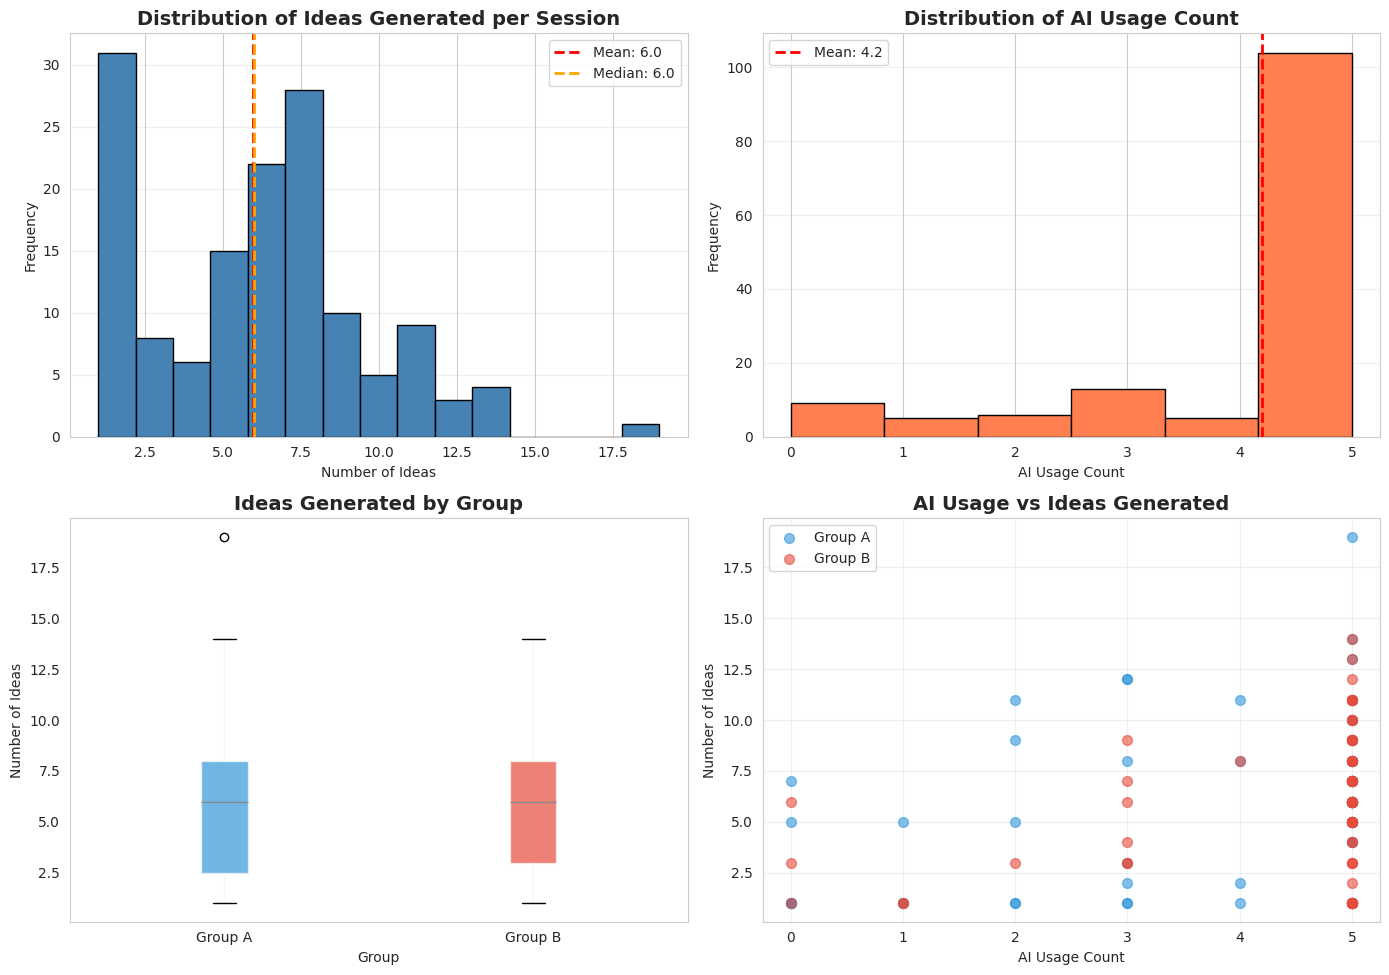

✅ Idea generation visualizations created!


In [12]:
# %%
# Visualize Idea Generation Patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Ideas Count Distribution
ax1 = axes[0, 0]
df_brainstorming_clean['ideas_count'].hist(bins=15, ax=ax1, color='steelblue', edgecolor='black')
ax1.axvline(df_brainstorming_clean['ideas_count'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {df_brainstorming_clean['ideas_count'].mean():.1f}")
ax1.axvline(df_brainstorming_clean['ideas_count'].median(), color='orange', 
            linestyle='--', linewidth=2, label=f"Median: {df_brainstorming_clean['ideas_count'].median():.1f}")
ax1.set_title('Distribution of Ideas Generated per Session', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Ideas')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: AI Usage Count Distribution
ax2 = axes[0, 1]
df_brainstorming_clean['ai_usage_count'].hist(bins=6, ax=ax2, color='coral', edgecolor='black')
ax2.axvline(df_brainstorming_clean['ai_usage_count'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {df_brainstorming_clean['ai_usage_count'].mean():.1f}")
ax2.set_title('Distribution of AI Usage Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('AI Usage Count')
ax2.set_ylabel('Frequency')
ax2.set_xticks([0, 1, 2, 3, 4, 5])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Ideas by Group (Box Plot)
ax3 = axes[1, 0]
df_brainstorm_with_group = df_brainstorming_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id'
)

# Create box plot with better colors
bp = df_brainstorm_with_group.boxplot(
    column='ideas_count', 
    by='group_assigned', 
    ax=ax3,
    patch_artist=True,
    grid=False,
    return_type='dict'
)

# Customize colors for each group
colors = ['#3498db', '#e74c3c']  # Blue for A, Red for B
for patch, color in zip(bp['ideas_count']['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax3.set_title('Ideas Generated by Group', fontsize=14, fontweight='bold')
ax3.set_xlabel('Group')
ax3.set_ylabel('Number of Ideas')
plt.sca(ax3)
plt.xticks([1, 2], ['Group A', 'Group B'])
ax3.get_figure().suptitle('')  # Remove automatic title

# Plot 4: AI Usage vs Ideas (Scatter)
ax4 = axes[1, 1]
colors_map = {'A': '#3498db', 'B': '#e74c3c'}
for group in ['A', 'B']:
    group_data = df_brainstorm_with_group[df_brainstorm_with_group['group_assigned'] == group]
    ax4.scatter(group_data['ai_usage_count'], group_data['ideas_count'], 
               alpha=0.6, s=50, label=f'Group {group}', color=colors_map[group])
ax4.set_title('AI Usage vs Ideas Generated', fontsize=14, fontweight='bold')
ax4.set_xlabel('AI Usage Count')
ax4.set_ylabel('Number of Ideas')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Idea generation visualizations created!")

#### 💡 Productivity Highlights
- Participants generated an average of **6 ideas per session** (median also 6)
- Idea counts ranged from **1 to 19**, showing big differences between individuals
- A total of **846 ideas** were created across **142 sessions**

#### 🤖 AI Usage Patterns
- **73% of participants used all 5 AI suggestions**
- On average, participants used **4.2 out of 5** AI suggestions
- Clear takeaway: **People want more AI help than they currently get**

#### 🧪 Group Comparison (A vs B)
- Both groups had a **similar median** number of ideas (~6)
- Spread and outliers look alike
- No clear visual difference — stats test coming next!

#### 🔄 AI Usage vs Idea Count
- More AI usage generally led to **more ideas**
- But results varied: some used max AI and still had few ideas
- Fun fact: one person made **19 ideas with zero AI help** — pure human creativity!

#### 👥 Participant Background
- **94%** have experience with in-person brainstorming
- **60%** have done remote brainstorming
- Both groups are balanced in terms of past experience
- Everyone gave consent and understood instructions — **great data quality**


## **3: How Did People Rate Their Experience?**

In [23]:
# Satisfaction Metrics Summary
print("="*60)
print("SATISFACTION & QUALITY RATINGS SUMMARY")
print("="*60)

# Merge questionnaires with group info
df_satisfaction = df_questionnaires_clean.merge(
    df_sessions_clean[['session_id', 'group_assigned']], 
    on='session_id',
    how='left'
)

satisfaction_summary = pd.DataFrame({
    'Metric': [
        'AI Helpfulness (1-5)',
        'General Impression (1-5)',
        'Idea Quality - Utility (1-5)',
        'Idea Quality - Originality (1-5)',
        'Personal Implication (1-5)',
        '',
        'Participants Rating AI as Helpful (4-5)',
        'Participants Very Satisfied (4-5)',
        'Low Originality Ratings (1-2)'
    ],
    'Mean': [
        df_satisfaction['ai_helpfulness'].mean().round(2),
        df_satisfaction['general_impression'].mean().round(2),
        df_satisfaction['idea_quality_utility'].mean().round(2),
        df_satisfaction['idea_quality_originality'].mean().round(2),
        df_satisfaction['personal_implication'].mean().round(2),
        '',
        f"{(df_satisfaction['ai_helpfulness'] >= 4).sum()} ({(df_satisfaction['ai_helpfulness'] >= 4).sum()/len(df_satisfaction)*100:.1f}%)",
        f"{(df_satisfaction['general_impression'] >= 4).sum()} ({(df_satisfaction['general_impression'] >= 4).sum()/len(df_satisfaction)*100:.1f}%)",
        f"{(df_satisfaction['idea_quality_originality'] <= 2).sum()} ({(df_satisfaction['idea_quality_originality'] <= 2).sum()/len(df_satisfaction)*100:.1f}%)"
    ],
    'Median': [
        df_satisfaction['ai_helpfulness'].median(),
        df_satisfaction['general_impression'].median(),
        df_satisfaction['idea_quality_utility'].median(),
        df_satisfaction['idea_quality_originality'].median(),
        df_satisfaction['personal_implication'].median(),
        '',
        '',
        '',
        ''
    ]
})

print(satisfaction_summary.to_string(index=False))
print("="*60)

SATISFACTION & QUALITY RATINGS SUMMARY
                                 Metric       Mean Median
                   AI Helpfulness (1-5)       3.51    4.0
               General Impression (1-5)       3.35    3.0
           Idea Quality - Utility (1-5)       3.43    3.0
       Idea Quality - Originality (1-5)       2.88    3.0
             Personal Implication (1-5)       3.34    4.0
                                                         
Participants Rating AI as Helpful (4-5) 77 (55.0%)       
      Participants Very Satisfied (4-5) 65 (46.4%)       
          Low Originality Ratings (1-2) 55 (39.3%)       


### 📊 **Key Insights from Satisfaction Ratings:**

#### **✅ What's Working:**
- **AI Helpfulness:** 3.51/5 - 55% found it helpful (4-5 rating)
- **Personal engagement:** Median 4 - people felt involved (impliqué)

#### **⚠️ What's Concerning:**
- **Only 46% very satisfied** (4-5 rating) - below 50%!
- **All metrics hover around 3.3-3.5** - mediocre, not impressive

#### **🚨 CRITICAL ISSUE: Originality Problem**
- **Lowest rating: 2.88/5** (below 3!)
- **39% gave low ratings (1-2)** - that's BAD
- Users think ideas **lack originality** 

**This is your biggest product risk!** If users think AI makes ideas generic, they won't adopt it.

### 3.2: Visualize Satisfaction Distributions

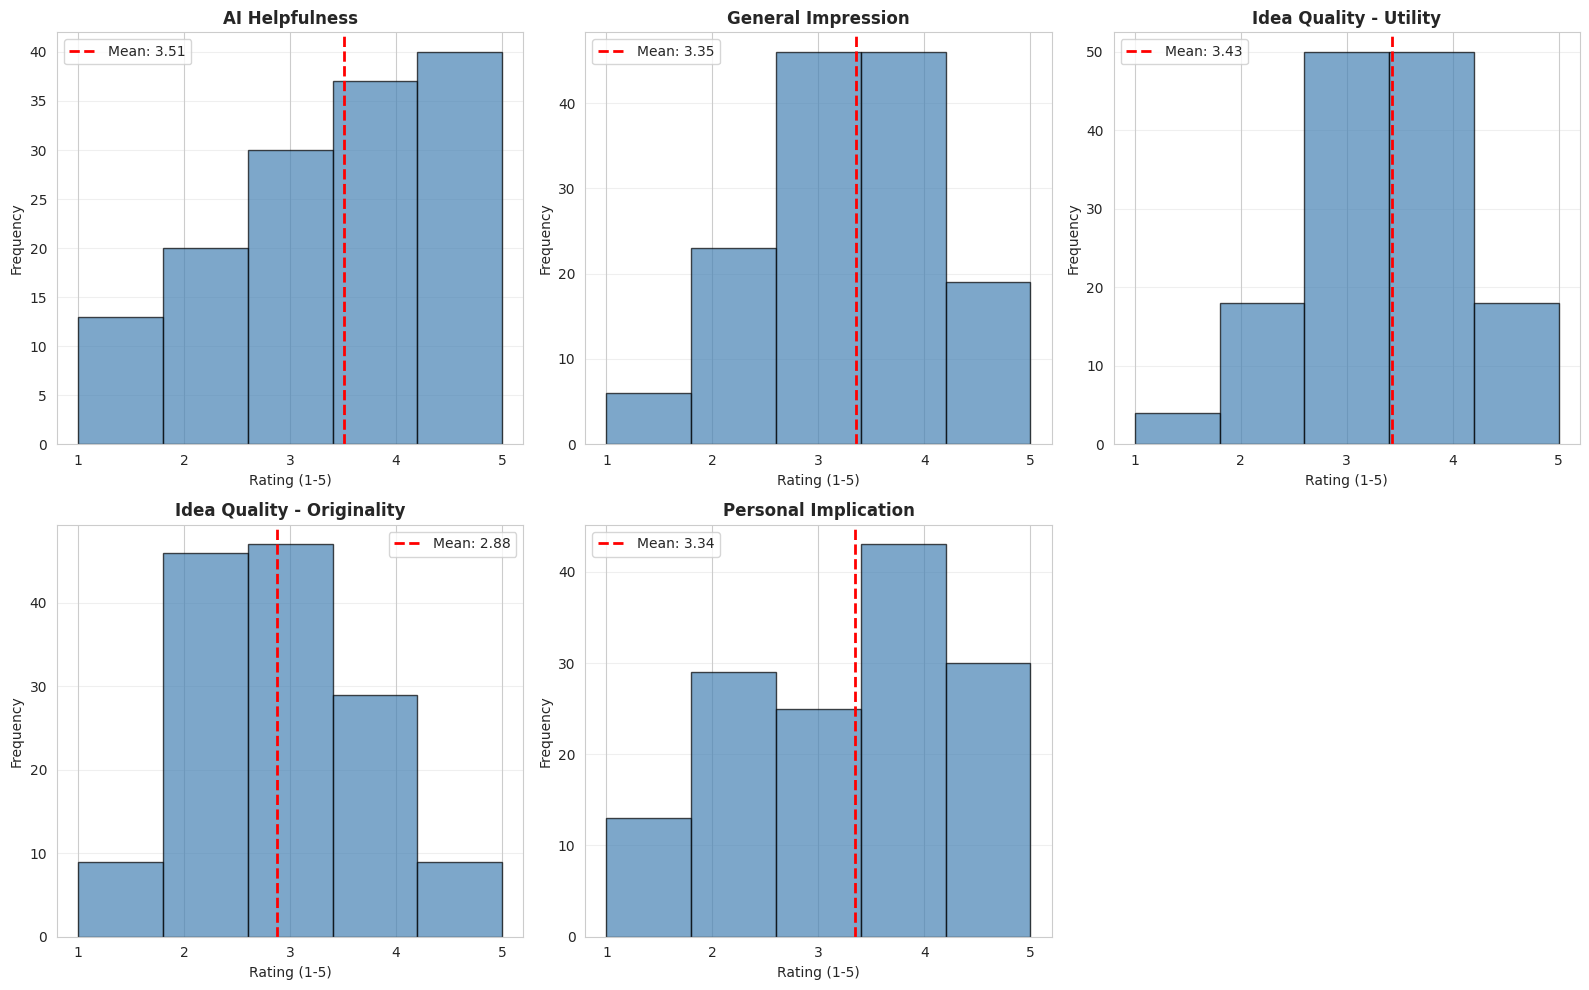

✅ Satisfaction distributions visualized!

⚠️  Notice: Originality has the lowest ratings and most spread!


In [24]:
# %%
# Visualize Satisfaction Ratings
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# All 5 metrics
metrics = [
    ('ai_helpfulness', 'AI Helpfulness'),
    ('general_impression', 'General Impression'),
    ('idea_quality_utility', 'Idea Quality - Utility'),
    ('idea_quality_originality', 'Idea Quality - Originality'),
    ('personal_implication', 'Personal Implication')
]

for idx, (col, title) in enumerate(metrics):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Histogram
    df_satisfaction[col].hist(bins=5, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Add mean line
    mean_val = df_satisfaction[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Rating (1-5)')
    ax.set_ylabel('Frequency')
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

print("✅ Satisfaction distributions visualized!")
print("\n⚠️  Notice: Originality has the lowest ratings and most spread!")

### 3.3: Compare Groups A vs B

In [25]:
# %%
# Group A vs B Satisfaction Comparison
print("="*60)
print("SATISFACTION BY GROUP - COMPARISON")
print("="*60)

comparison_metrics = ['ai_helpfulness', 'general_impression', 'idea_quality_utility', 
                      'idea_quality_originality', 'personal_implication']

comparison_df = pd.DataFrame({
    'Metric': [
        'AI Helpfulness',
        'General Impression', 
        'Idea Quality - Utility',
        'Idea Quality - Originality',
        'Personal Implication'
    ],
    'Group A Mean': [df_satisfaction[df_satisfaction['group_assigned'] == 'A'][col].mean().round(2) 
                     for col in comparison_metrics],
    'Group B Mean': [df_satisfaction[df_satisfaction['group_assigned'] == 'B'][col].mean().round(2) 
                     for col in comparison_metrics],
    'Difference (B-A)': [
        (df_satisfaction[df_satisfaction['group_assigned'] == 'B'][col].mean() - 
         df_satisfaction[df_satisfaction['group_assigned'] == 'A'][col].mean()).round(2)
        for col in comparison_metrics
    ]
})

print(comparison_df.to_string(index=False))
print("\n" + "="*60)
print("Note: Positive difference = Group B rated higher")
print("      Statistical significance testing needed (tomorrow)")
print("="*60)

SATISFACTION BY GROUP - COMPARISON
                    Metric  Group A Mean  Group B Mean  Difference (B-A)
            AI Helpfulness          3.44          3.58              0.14
        General Impression          3.23          3.48              0.25
    Idea Quality - Utility          3.28          3.58              0.30
Idea Quality - Originality          2.90          2.86             -0.05
      Personal Implication          3.07          3.62              0.55

Note: Positive difference = Group B rated higher
      Statistical significance testing needed (tomorrow)


### **Group B Wins on 4 out of 5 Metrics:**

✅ **Personal Implication: +0.55** (BIGGEST difference!)
- Group B: 3.62 vs Group A: 3.07
- **Direct AI suggestions made people feel MORE engaged**

✅ **Idea Quality - Utility: +0.30**
- Group B: 3.58 vs Group A: 3.28
- Direct suggestions seen as more practical/useful

✅ **General Impression: +0.25**
- Group B: 3.48 vs Group A: 3.23
- Overall satisfaction higher with direct mode

✅ **AI Helpfulness: +0.14**
- Group B: 3.58 vs Group A: 3.44
- Slightly more helpful

### **Originality: No Clear Winner (-0.05)**
❌ Both groups rate originality LOW (~2.88)
- Group A: 2.90, Group B: 2.86
- **The originality problem affects BOTH approaches equally**

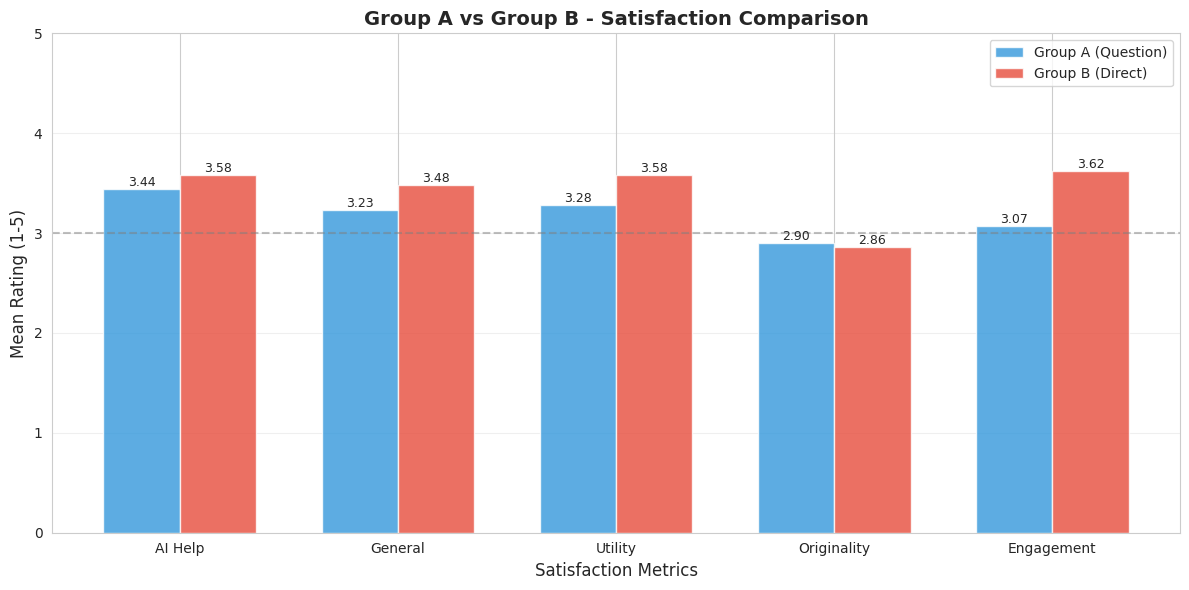

✅ Group comparison visualized!

🎯 Key Insight: Group B (Direct) outperforms on 4/5 metrics
⚠️  Both groups struggle with originality (~2.88)


In [26]:
# %%
# Visualize Group Comparison
fig, ax = plt.subplots(figsize=(12, 6))

metrics_short = ['AI Help', 'General', 'Utility', 'Originality', 'Engagement']
group_a_means = [3.44, 3.23, 3.28, 2.90, 3.07]
group_b_means = [3.58, 3.48, 3.58, 2.86, 3.62]

x = np.arange(len(metrics_short))
width = 0.35

bars1 = ax.bar(x - width/2, group_a_means, width, label='Group A (Question)', 
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, group_b_means, width, label='Group B (Direct)', 
               color='#e74c3c', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Satisfaction Metrics', fontsize=12)
ax.set_ylabel('Mean Rating (1-5)', fontsize=12)
ax.set_title('Group A vs Group B - Satisfaction Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_short)
ax.legend()
ax.set_ylim([0, 5])
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3.0)')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Group comparison visualized!")
print("\n🎯 Key Insight: Group B (Direct) outperforms on 4/5 metrics")
print("⚠️  Both groups struggle with originality (~2.88)")

### 🌟 Section 3 Summary: User Satisfaction & Quality Perceptions

#### 😊 Overall Satisfaction
- Average ratings fall in the **3.3–3.5** range (moderate satisfaction)
- Only **46% of participants were very satisfied** (rated 4 or 5)
- Most scores hover around **3.0** (neutral)
- **AI Helpfulness** is the top-rated metric at **3.51**

#### 🚨 Originality Problem
- **Originality scored lowest**: just **2.88/5**
- **39% of users gave low ratings (1–2)** for originality
- AI-generated ideas are seen as **generic or uncreative**
- This issue affects **both groups equally**
- Represents a **major risk** for product adoption and retention

#### 🆚 Group Comparison: B Beats A
- **Group B (Direct AI)** outperformed **Group A (Question-based)** across key metrics:
  - **Personal Engagement**: 3.62 vs 3.07 (**+0.55**)
  - **Idea Utility**: 3.58 vs 3.28 (**+0.30**)
  - **General Impression**: 3.48 vs 3.23 (**+0.25**)
  - **AI Helpfulness**: 3.58 vs 3.44 (**+0.14**)
  - **Originality**: No difference (both ~2.88)

#### 💡 Key Takeaways
- **Direct AI suggestions are more effective** than question-based prompts
- Users prefer **concrete ideas** over abstract guidance
- However, the **originality issue must be addressed** regardless of method

## **4: What Are People Saying?** 

In [27]:
df_satisfaction.head()

,questionnaire_id,session_id,group,ai_benefits,difficulties,external_help,ai_helpfulness,ai_limitations,general_impression,idea_quality_utility,idea_quality_originality,personal_implication,additional_comments,completed_at,group_assigned
0,1,362a42fb-cf47-4ebf-abf6-7c1131f94e11,B,"[stimulatingNewIdeas, timeSaving]",[noDifficulty],noExternalHelp,2,"If I didn't like the answer, it was still coun...",4,5,4,3,None,2025-09-03 18:27:28.764000+00:00,B
1,2,187aea78-1f2b-4720-98f7-3915ddb659be,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,non,5,4,4,5,None,2025-09-03 18:29:20.326000+00:00,B
2,3,9249cc22-ee1a-440e-85d0-3f018afbe082,B,"[timeSaving, stimulatingNewIdeas]",[lackInspiration],noExternalHelp,4,no,3,4,4,3,none,2025-09-03 18:46:19.376000+00:00,B
3,4,0c82ca88-3e43-49ed-859f-fd24173e7fe6,A,[helpReformulation],[noDifficulty],noExternalHelp,4,non,4,4,3,4,"session tres interessante, je vous en remercie",2025-09-03 18:44:13.411000+00:00,A
4,5,421a5ad2-0867-460b-891b-200786b51f60,B,"[timeSaving, stimulatingNewIdeas, betterThough...",[noDifficulty],noExternalHelp,5,Non je n'ai pas perçu de freins ou de limites ...,5,5,5,5,Très bonne étude.,2025-09-03 18:51:04.137000+00:00,B


In [28]:
# Benefits Analysis
print("="*60)
print("AI BENEFITS REPORTED")
print("="*60)

# Count benefits (they're numpy arrays)
benefit_counts = {}
for benefits in df_satisfaction['ai_benefits'].dropna():
    if hasattr(benefits, '__iter__') and not isinstance(benefits, str):
        for benefit in benefits:
            benefit_counts[benefit] = benefit_counts.get(benefit, 0) + 1

print(f"\nTotal responses with benefits: {len(df_satisfaction['ai_benefits'].dropna())}")
print(f"\nTop AI Benefits Reported:")
for benefit, count in sorted(benefit_counts.items(), key=lambda x: x[1], reverse=True):
    pct = count / len(df_satisfaction['ai_benefits'].dropna()) * 100
    print(f"  {benefit}: {count} ({pct:.1f}%)")

print("="*60)

AI BENEFITS REPORTED

Total responses with benefits: 138

Top AI Benefits Reported:
  stimulatingNewIdeas: 95 (68.8%)
  timeSaving: 72 (52.2%)
  betterThoughtOrganization: 33 (23.9%)
  helpReformulation: 29 (21.0%)
  noBenefitPerceived: 15 (10.9%)
  otherBenefit: 3 (2.2%)
